In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files_df = pd.read_json("../data/files_Ns_df.json")

In [3]:
files_df.head(5)

,periodical_category,periodical_href,periodical_title,periodical_basic_info,file_url,filename,year,bezpečí_N,nebezpečí_N,bezpečnost_N,pages_N,tokens_N
0,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1986_2_vina_ocr.txt,1986.0,0,7,0,36,24524
1,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1987_3_freud-a-psychoanalyza_ocr.txt,1987.0,1,1,0,42,21575
2,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1988_4_sluzba-zivotu_rok-blahoslavene-anez...,1988.0,0,2,0,25,14764
3,samizdat,/cs/periodika/ps-psi,Ψ [Psí],"[, [Praha] , 1985 – 1989 , 1 × ročně , ]",https://files.scriptum.cz/scriptum/%5Bnode%5D/...,psi_1989_5_vira-v-modernim-svete_ocr.txt,1989.0,0,1,0,36,23867
4,samizdat,/cs/periodika/abecedni-casopis,Abecední časopis,"[, Praha , 1985 - 1986 , nepravidelně , ]",https://files.scriptum.cz/scriptum/abecedni-ca...,abecedni-casopis_1986_2_bonifac_tit-str-obsah_...,1986.0,0,0,0,2,87


In [6]:
files_df["pages_N"].sum()

318091

In [8]:
files_df["tokens_N"].sum()

225245910

In [9]:
files_df["tokens_N"].sum() / files_df["pages_N"].sum()

708.1178342046773

In [10]:
files_df[files_df["periodical_category"]=="samizdat"]["tokens_N"].sum()

35705635

In [14]:
len(files_df[files_df["periodical_category"]=="samizdat"])

2324

In [11]:
files_df[files_df["periodical_category"]=="exil"]["tokens_N"].sum()

189540275

In [15]:
len(files_df[files_df["periodical_category"]=="exil"])

9290

[Text(0, 0, '0M'),
 Text(0, 50000000, '50M'),
 Text(0, 100000000, '100M'),
 Text(0, 150000000, '150M')]

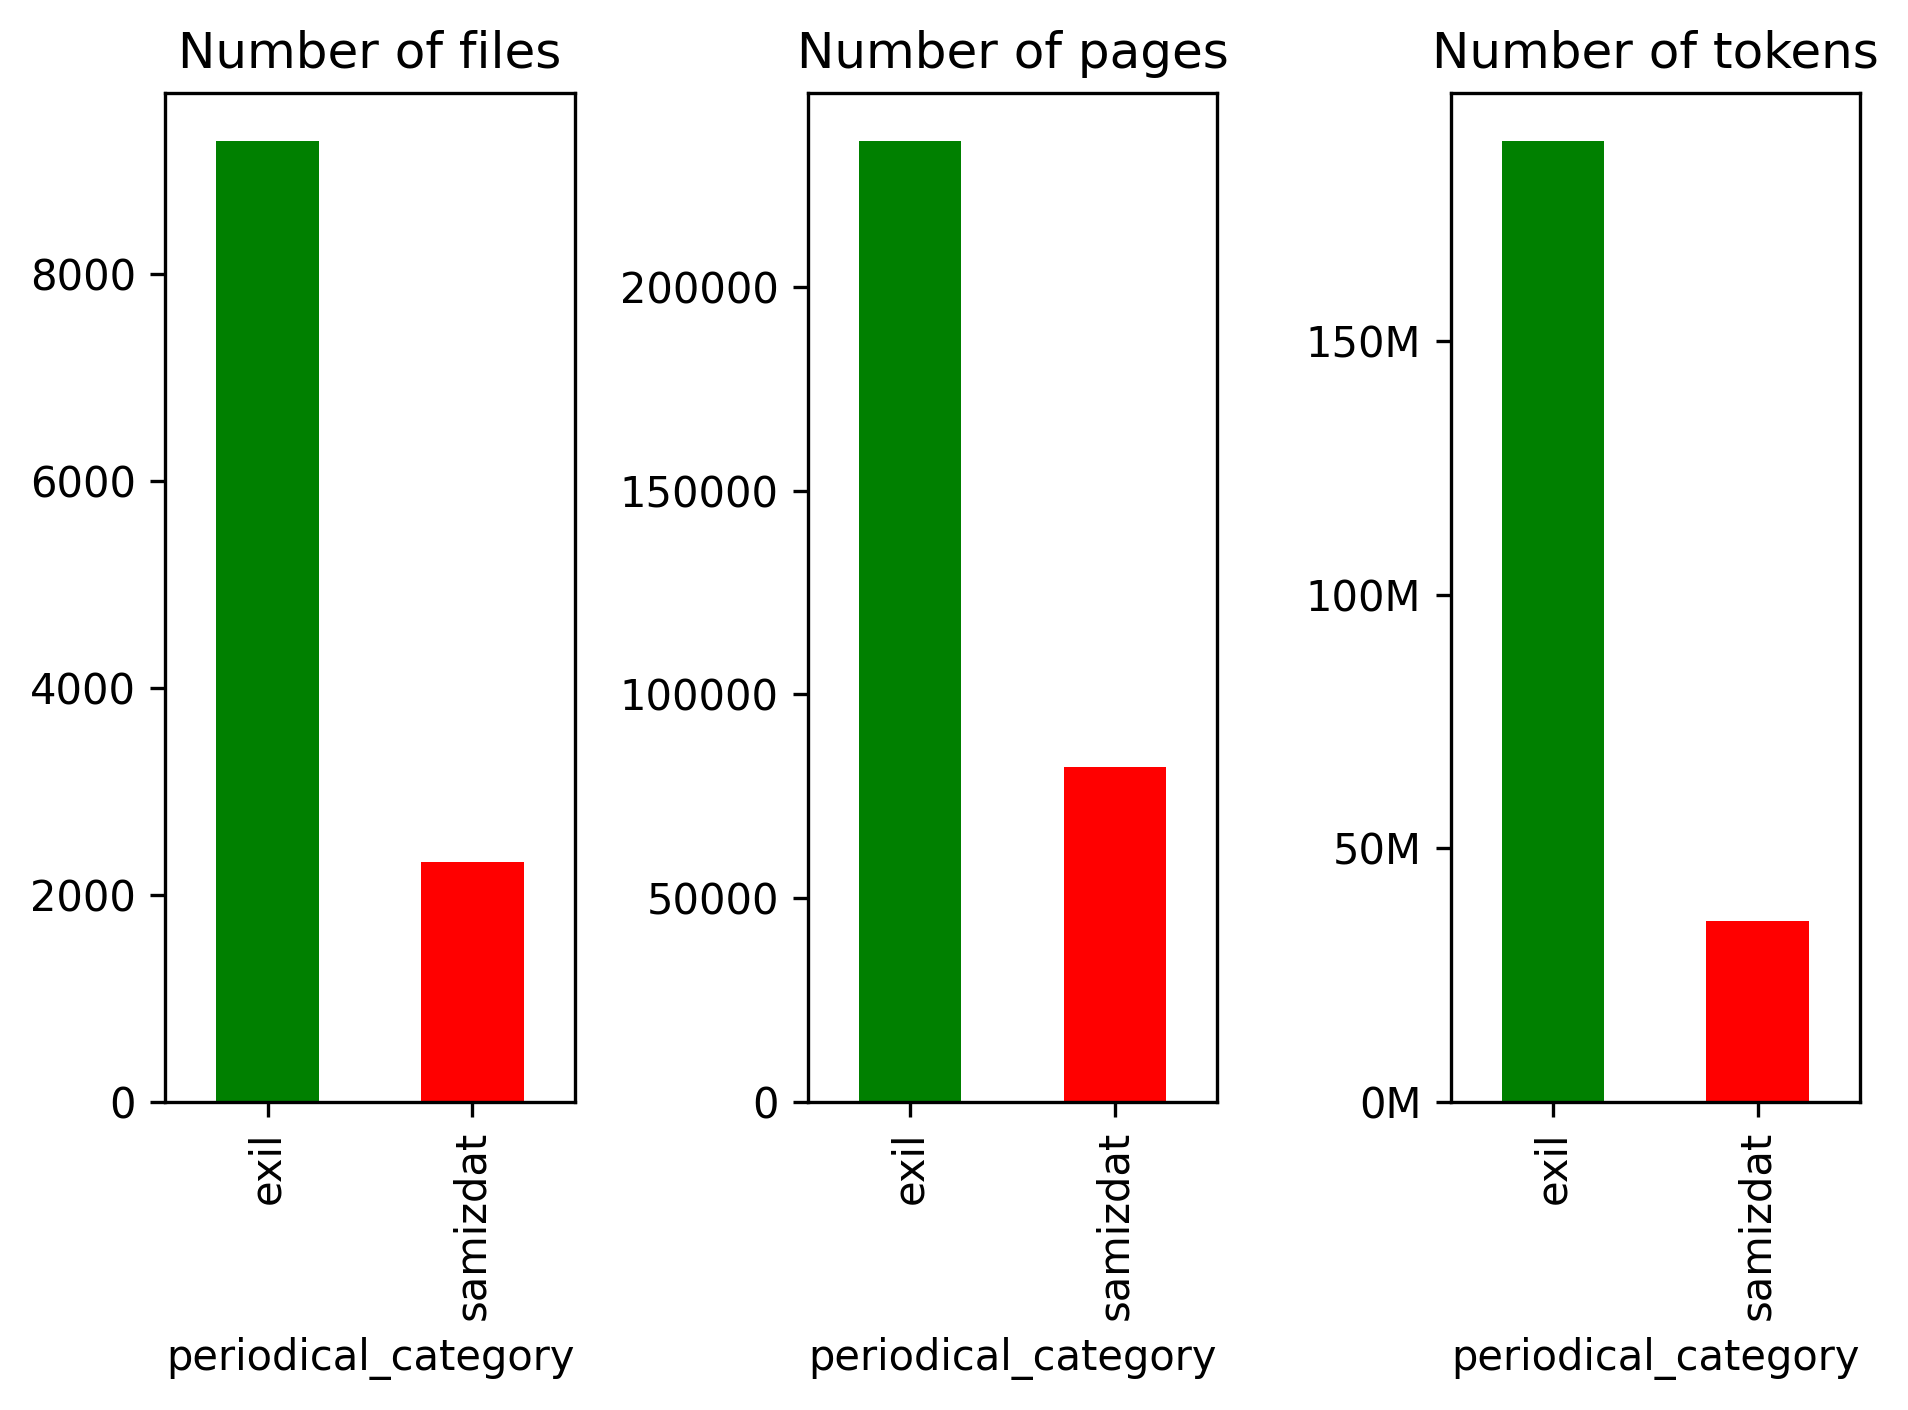

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=300, tight_layout=True)
files_df.groupby("periodical_category").size().plot(kind='bar', color=["green", "red"], ax=axs[0])
files_df.groupby("periodical_category")["pages_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[1])
files_df.groupby("periodical_category")["tokens_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[2])

axs[0].set_title("Number of files")
axs[1].set_title("Number of pages")
axs[2].set_title("Number of tokens")


axs[2].set_yticks(range(0,200000000, 50000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,200, 50)])

In [28]:
fig.savefig("../figures/scriptum_overview_unfiltered.png")

In [29]:
sum(files_df["year"].apply(lambda x: 1948 <= x <= 1989))

8745

In [30]:
files_df["communism"] = files_df["year"].apply(lambda x: 1948 <= x <= 1989)

[Text(0, 0, '0M'),
 Text(0, 50000000, '50M'),
 Text(0, 100000000, '100M'),
 Text(0, 150000000, '150M')]

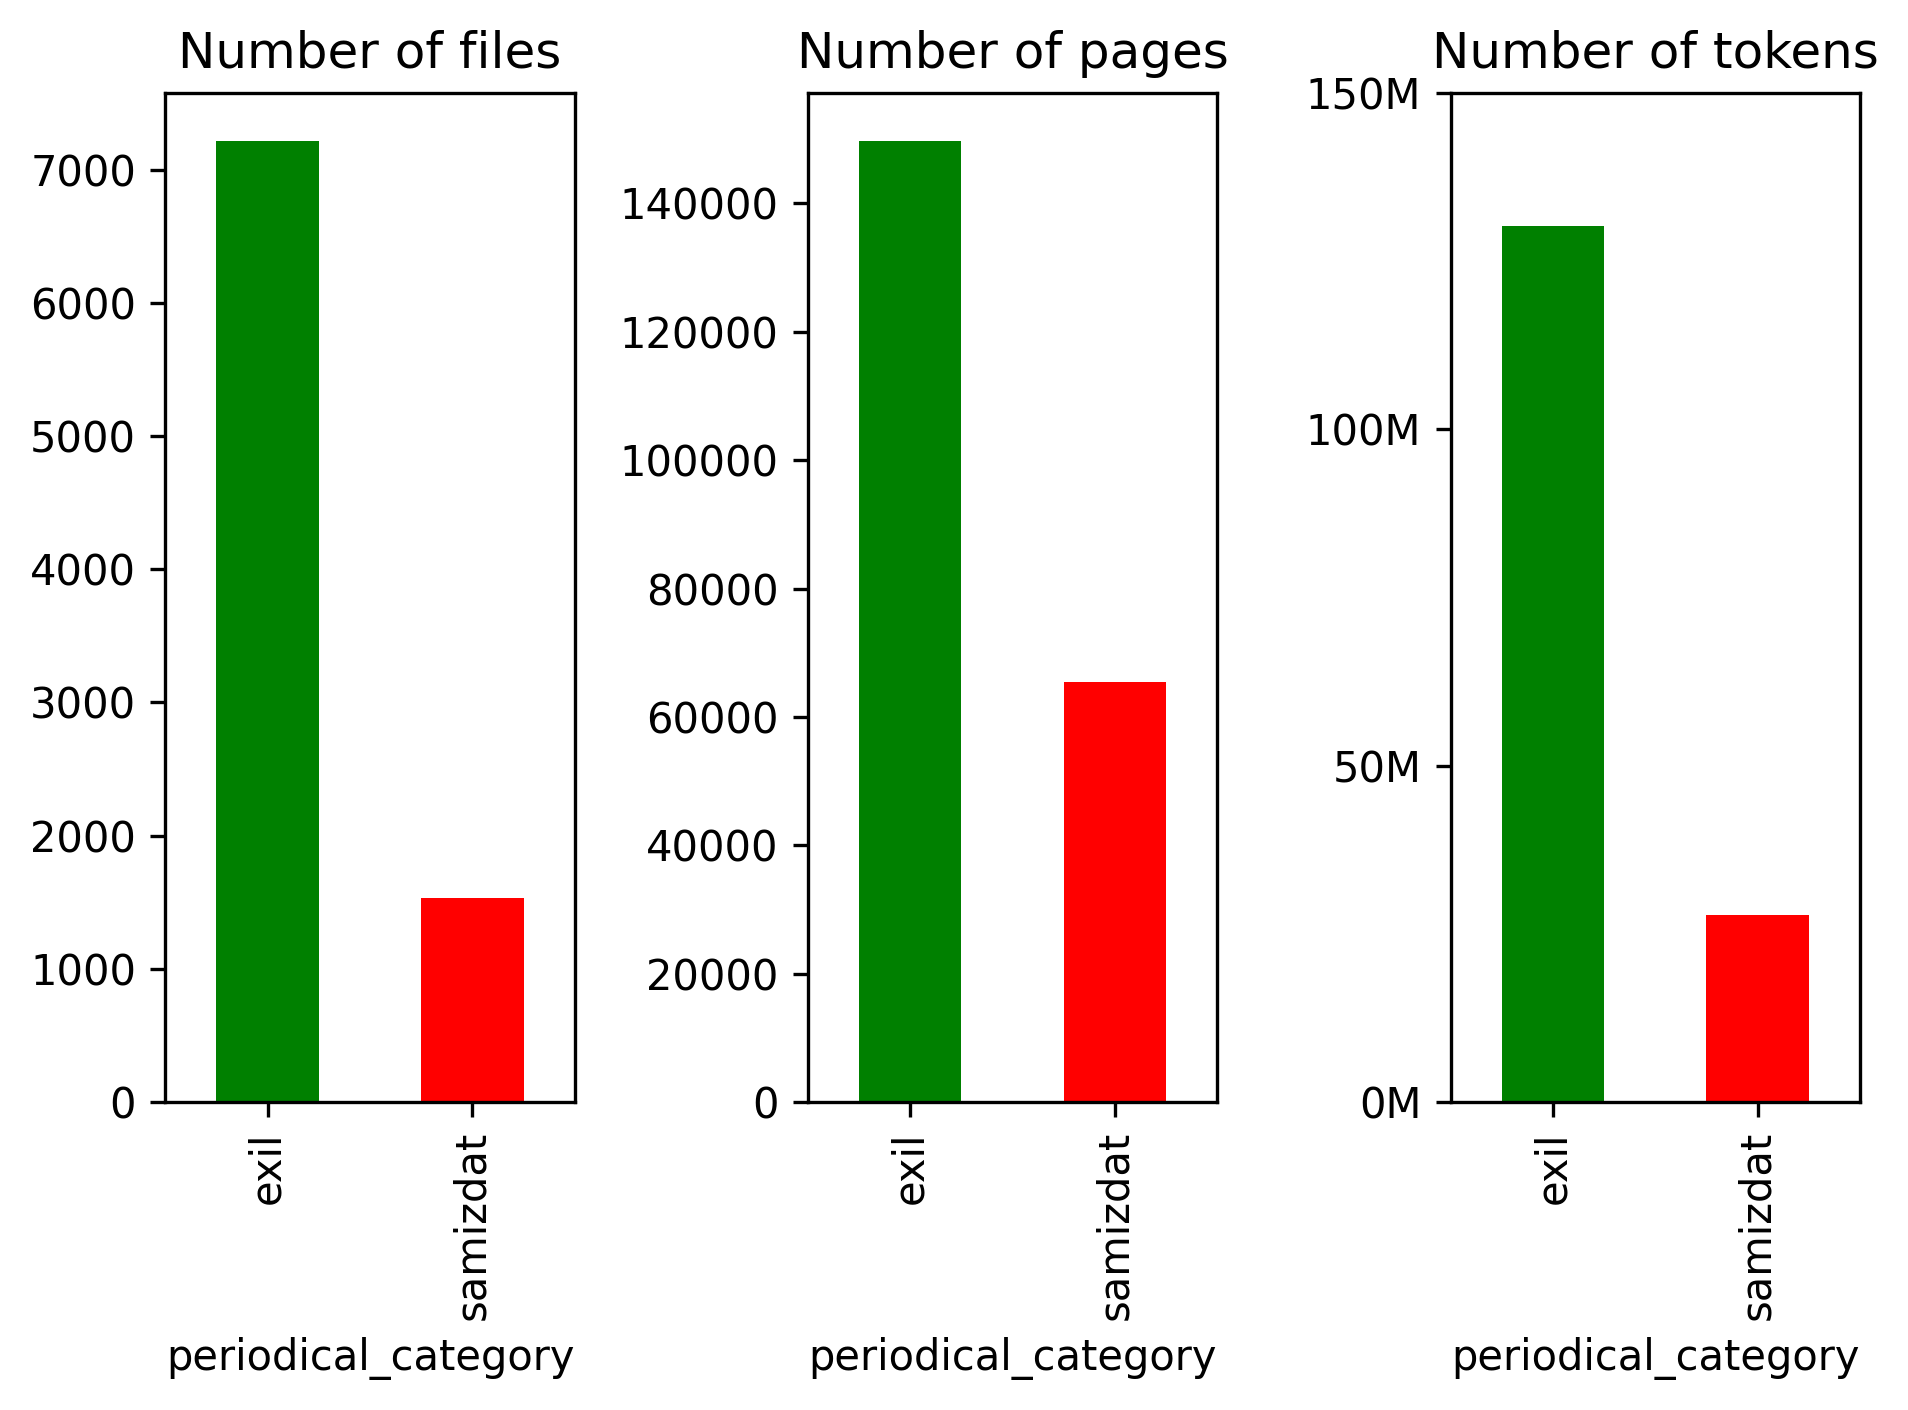

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=300, tight_layout=True)
files_df[files_df["communism"]].groupby("periodical_category").size().plot(kind='bar', color=["green", "red"], ax=axs[0])
files_df[files_df["communism"]].groupby("periodical_category")["pages_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[1])
files_df[files_df["communism"]].groupby("periodical_category")["tokens_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[2])

axs[0].set_title("Number of files")
axs[1].set_title("Number of pages")
axs[2].set_title("Number of tokens")


axs[2].set_yticks(range(0,200000000, 50000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,200, 50)])

In [32]:
fig.savefig("../figures/scriptum_overview_filtered.png")

### Temporal overview

In [48]:
decade_bins = np.arange(1940, 2000, 10)
decades_labels = ["40th", "50th", "60th", "70th", "80th"]
decade_bins

array([1940, 1950, 1960, 1970, 1980, 1990])

[Text(0, 0, '0M'),
 Text(0, 20000000, '20M'),
 Text(0, 40000000, '40M'),
 Text(0, 60000000, '60M'),
 Text(0, 80000000, '80M')]

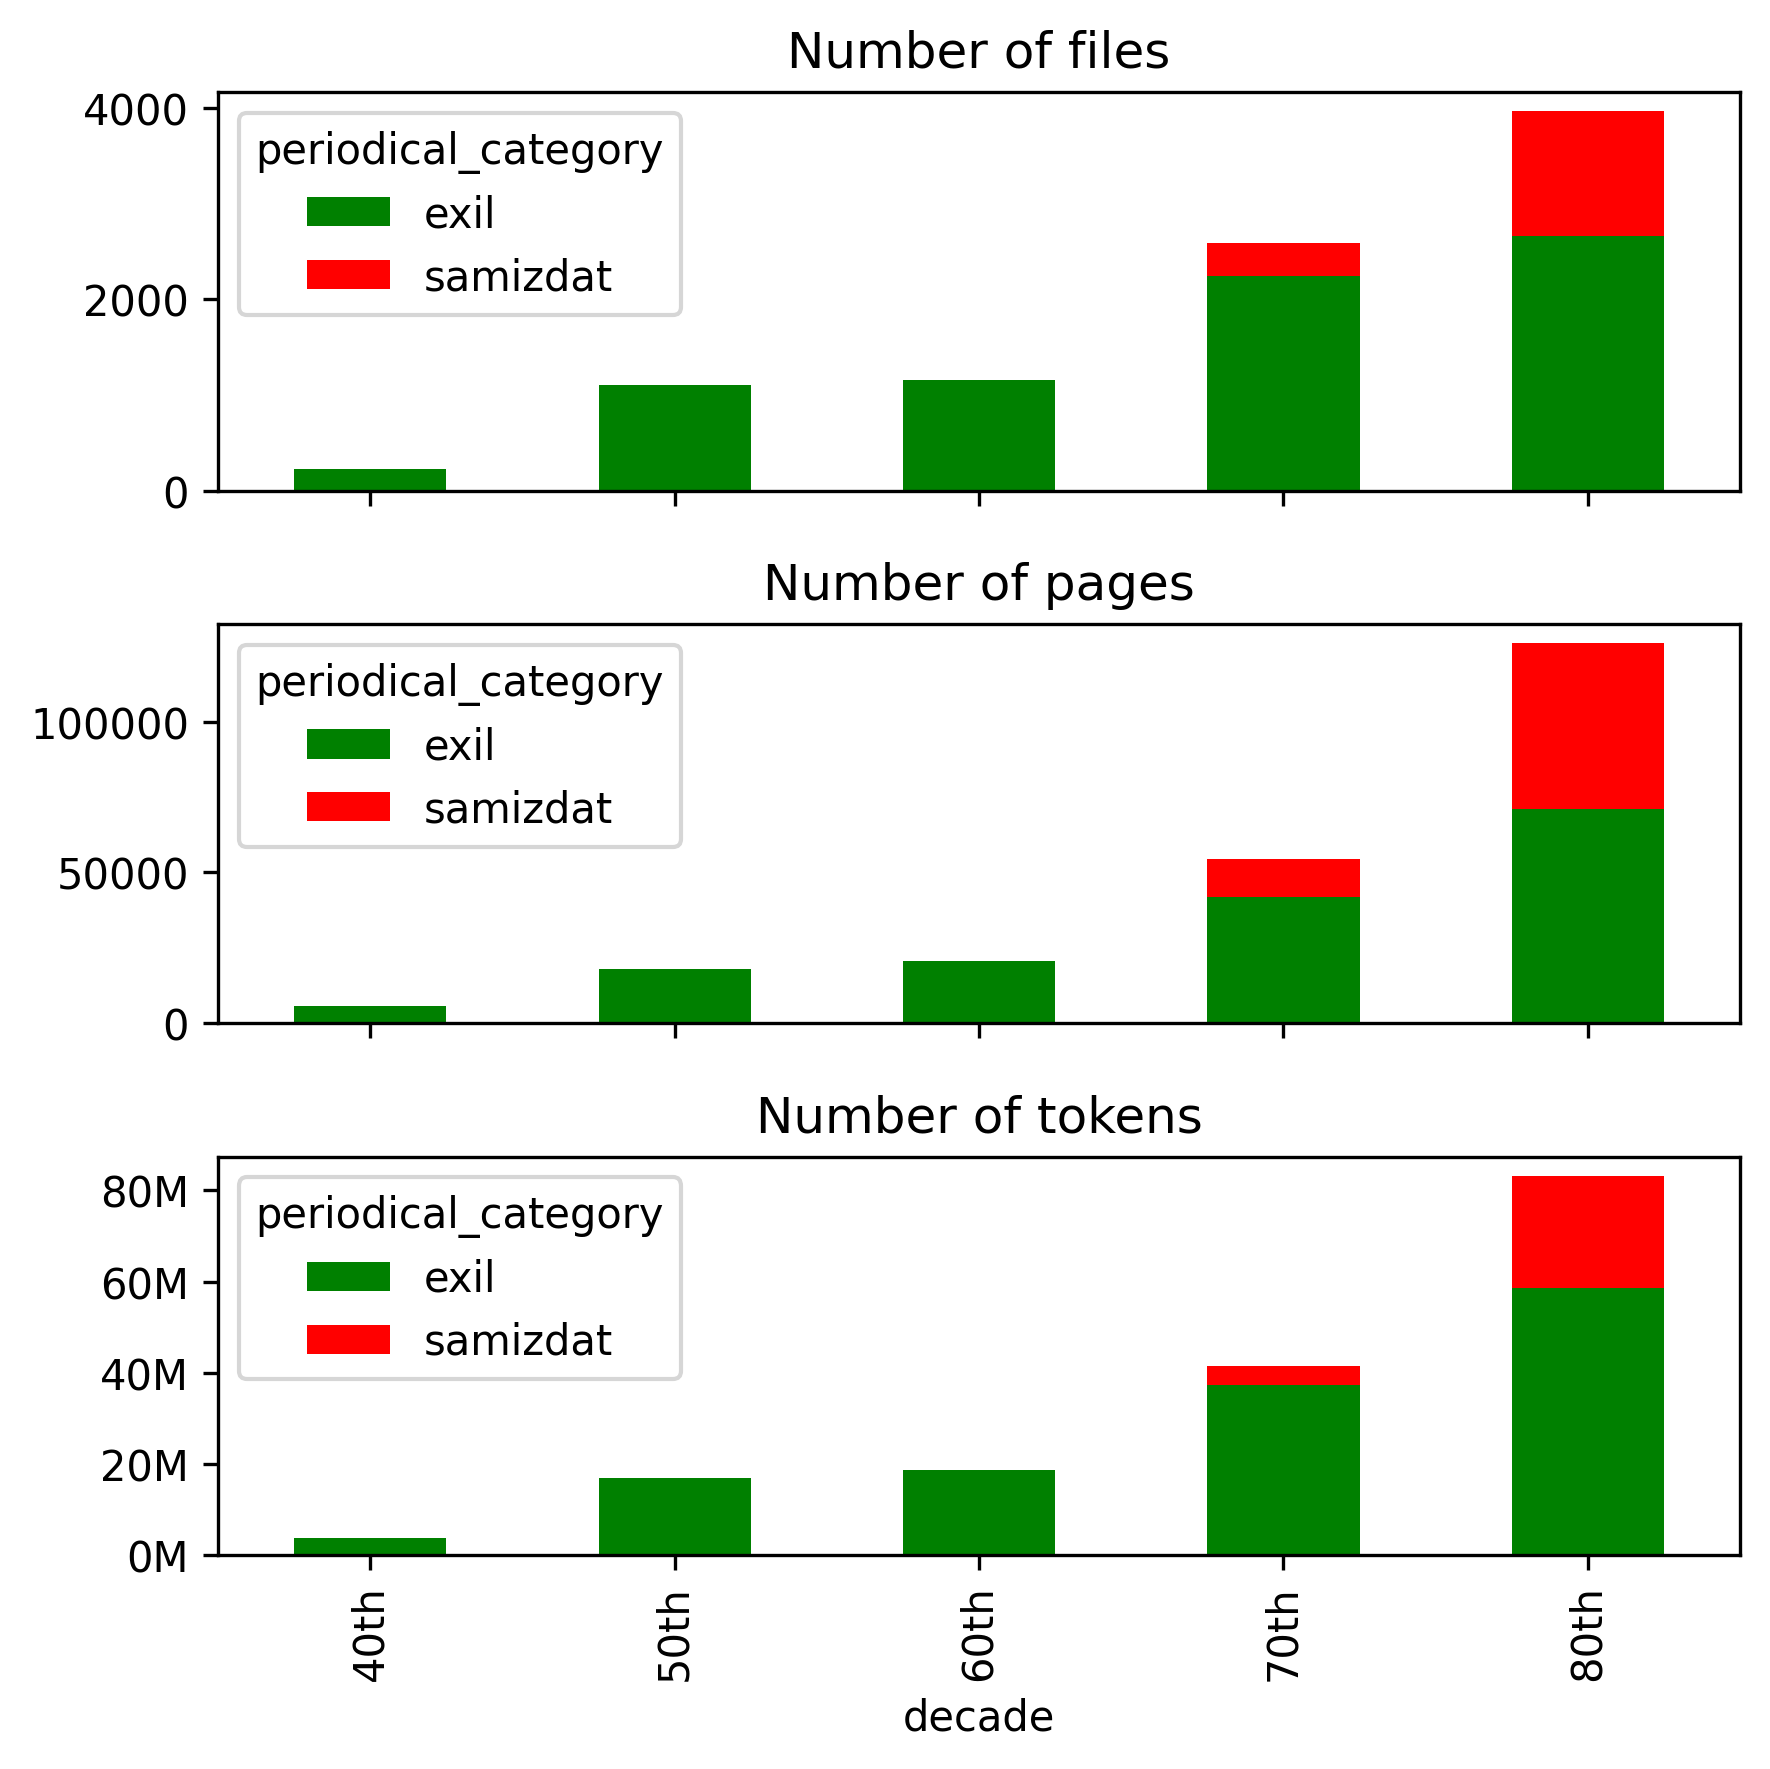

In [57]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6,6), dpi=300, tight_layout=True)
decade_bins = np.arange(1940, 2000, 10)
periodical_decade_counts = files_df.groupby(['periodical_category', pd.cut(files_df['year'], bins=decade_bins)], observed=True).size()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[0])
axs[0].set_title("Number of files")
axs[0].set_xticklabels([])
axs[0].set_xlabel("")

periodical_decade_counts = files_df.groupby(['periodical_category', pd.cut(files_df['year'], bins=decade_bins)], observed=True)["pages_N"].sum()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[1])
axs[1].set_title("Number of pages")
axs[1].set_xticklabels([])
axs[1].set_xlabel("")


periodical_decade_counts = files_df.groupby(['periodical_category', pd.cut(files_df['year'], bins=decade_bins)], observed=True)["tokens_N"].sum()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[2])
axs[2].set_title("Number of tokens")
axs[2].set_xticklabels(decades_labels)
axs[2].set_xlabel("decade")
axs[2].set_yticks(range(0,100000000, 20000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,100, 20)])


In [58]:
fig.savefig("../figures/scriptum_temporal_overview.png")

### Most prominent periodicals

In [83]:
files_df = files_df[files_df["periodical_title"]!="Obsah"]
len(files_df)

11526

In [85]:
files_df = files_df[files_df["communism"]]
len(files_df)

8659

[Text(0, 0, '0M'),
 Text(1000000, 0, '1M'),
 Text(2000000, 0, '2M'),
 Text(3000000, 0, '3M')]

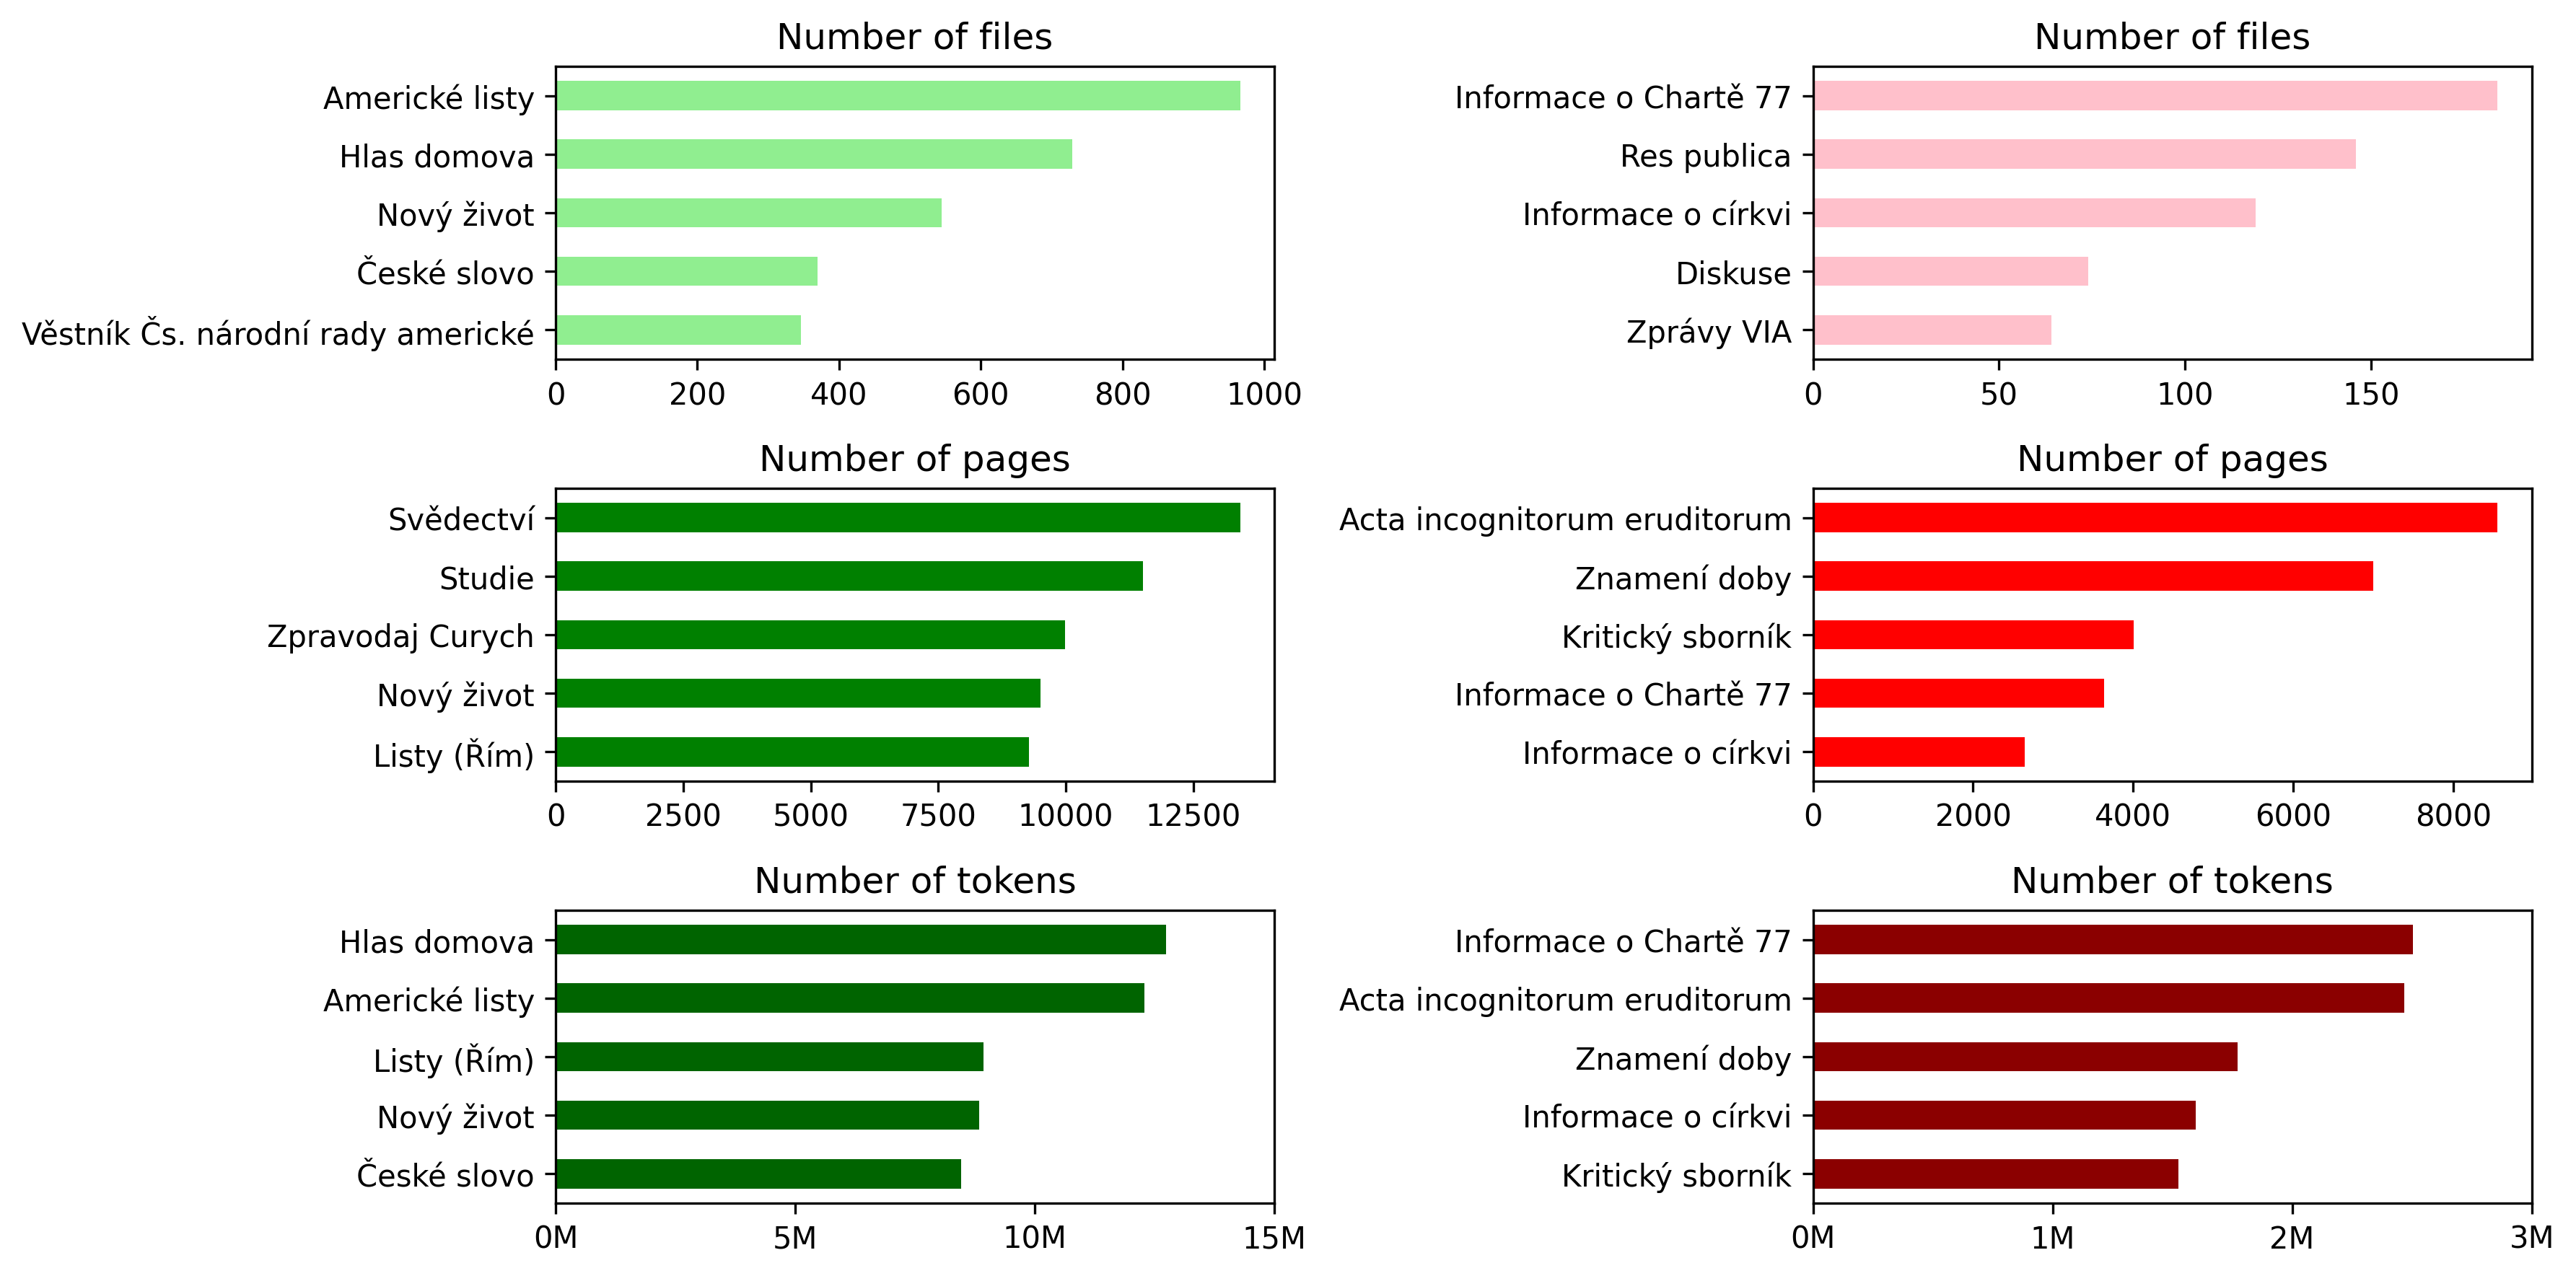

In [87]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,6), dpi=300, tight_layout=True)
files_df[files_df["periodical_category"]=="exil"].groupby("periodical_title").size().sort_values(ascending=True).tail(5).plot(kind='barh', color="lightgreen", ax=axs[0, 0])
axs[0, 0].set_title("Number of files")
axs[0, 0].set_ylabel("")

files_df[files_df["periodical_category"]=="exil"].groupby("periodical_title")["pages_N"].sum().sort_values(ascending=True).tail(5).plot(kind='barh', color="green", ax=axs[1,0])
axs[1, 0].set_title("Number of pages")
axs[1, 0].set_ylabel("")

files_df[files_df["periodical_category"]=="exil"].groupby("periodical_title")["tokens_N"].sum().sort_values(ascending=True).tail(5).plot(kind='barh', color="darkgreen", ax=axs[2,0])
axs[2, 0].set_title("Number of tokens")
axs[2, 0].set_ylabel("")
axs[2, 0].set_xticks(range(0,20000000, 5000000))
axs[2, 0].set_xticklabels([str(n)+ "M" for n in range(0,20, 5)])

files_df[files_df["periodical_category"]=="samizdat"].groupby("periodical_title").size().sort_values(ascending=True).tail(5).plot(kind='barh', color="pink", ax=axs[0, 1])
axs[0, 1].set_title("Number of files")
axs[0, 1].set_ylabel("")

files_df[files_df["periodical_category"]=="samizdat"].groupby("periodical_title")["pages_N"].sum().sort_values(ascending=True).tail(5).plot(kind='barh', color="red", ax=axs[1, 1])
axs[1, 1].set_title("Number of pages")
axs[1, 1].set_ylabel("")

files_df[files_df["periodical_category"]=="samizdat"].groupby("periodical_title")["tokens_N"].sum().sort_values(ascending=True).tail(5).plot(kind='barh', color="darkred", ax=axs[2, 1])
axs[2, 1].set_title("Number of tokens")
axs[2, 1].set_ylabel("")
axs[2, 1].set_xticks(range(0,4000000, 1000000))
axs[2, 1].set_xticklabels([str(n)+ "M" for n in range(0,4)])

In [88]:
fig.savefig("../figures/scriptum_prominent_periodicals_.png")